## Sentiment Analysis of IMDB Movie Reviews using Convolutional Neural Networks

### Abstract
#### This project uses Convolutional Neural Network to perfrom Sentiment Analysis on Movie Reviews collected from IMDb. We used Keras to build a CNN model, after fine tuning the hyperparameters, model achieved 88.88% accuracy on test dataset. Based on some previous experiments, it is very likely that combining Convolutional Neural Network (CNN) with Recurrent Neural Network (RNN) could increase the test accuracy.

### Introduction
#### 1. IMDb is an online database of information related to world films, television programs, home videos and video games and internet streams. IMDb are very famous for authenticate movie ratings and reviews. <br><br>2. Our task is to build a model which will classify the movie reviews as either Positive or Negative. We are using Convolutional Neural Network (CNN) to learn patterns in a sentence with the help of Convolution1D from Keras. <br><br>3. Our approach is to tokenize the sentence and limit its length to a pre-defined value (400). Using Conv1D with window size 3, learn a filter and perform max pooling operation. Then use Feed Forward Neural Network with Dense layer and ReLU as activation function. Finally I used single unit output layer with sigmoid function to classify review as either positive or negative.     

In [1]:
#Imports
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
print('Defining Hyperparameters...')
max_features = 5000
maxlen = 400
batch_size = 100
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 5

Defining Hyperparameters...


In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [4]:
print('Padding sequences...')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Padding sequences...


In [5]:
print('Define model...')
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,kernel_size,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

Define model...


In [6]:
print('Build model...')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
performance = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Build model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 370s 15ms/step - loss: 0.4726 - acc: 0.7559 - val_loss: 0.3067 - val_acc: 0.8689
Epoch 2/5
25000/25000 [==============================] - 368s 15ms/step - loss: 0.2508 - acc: 0.8970 - val_loss: 0.2630 - val_acc: 0.8892
Epoch 3/5
25000/25000 [==============================] - 339s 14ms/step - loss: 0.1811 - acc: 0.9303 - val_loss: 0.2733 - val_acc: 0.8886
Epoch 4/5
25000/25000 [==============================] - 201s 8ms/step - loss: 0.1300 - acc: 0.9531 - val_loss: 0.2835 - val_acc: 0.8905
Epoch 5/5
25000/25000 [==============================] - 198s 8ms/step - loss: 0.0877 - acc: 0.9708 - val_loss: 0.3126 - val_acc: 0.8888


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

Text(0.5,1,'Train vs Validation Accuracy')

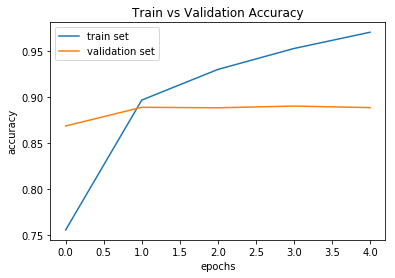

In [8]:
plt.plot(performance.history['acc'])
plt.plot(performance.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Accuracy')

Text(0.5,1,'Train vs Validation Loss')

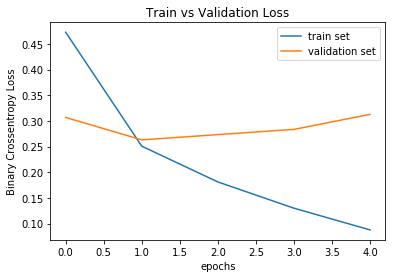

In [9]:
plt.plot(performance.history['loss'])
plt.plot(performance.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Loss')